In [2]:
from graphviz import Digraph

def create_mind_map(data, output_file="mindmap"):
    graph = Digraph(format="png")
    
    def add_nodes(parent, children):
        for child in children:
            graph.edge(parent, child["name"])
            if "children" in child:
                add_nodes(child["name"], child["children"])

    root = data["root"]
    graph.node(root)
    for branch in data["branches"]:
        graph.edge(root, branch["name"])
        if "children" in branch:
            add_nodes(branch["name"], branch["children"])
    
    graph.render(output_file)
    


result = create_mind_map(data)
result


NameError: name 'data' is not defined

In [5]:
!pip install graphviz

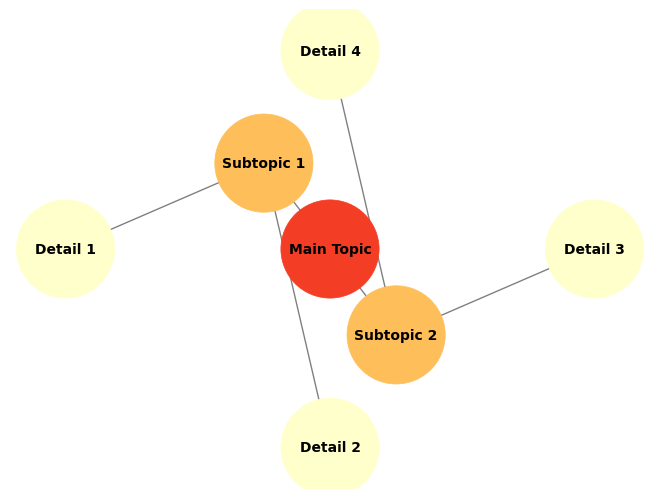

In [4]:
import json
import networkx as nx
import matplotlib.pyplot as plt

def create_mindmap(json_data):
    """
    Generates a mindmap from the given JSON data, arranged radially like XMind.

    Parameters:
        json_data (str): JSON string containing mindmap data.

    Returns:
        None
    """
    try:
        # Parse the JSON data
        data = json.loads(json_data)
        
        # Create a new directed graph
        G = nx.DiGraph()
        
        # Dictionary to hold node depths
        node_depth = {}
        
        # Function to add nodes recursively and determine their depth
        def add_nodes(node, parent=None, depth=0):
            for key, value in node.items():
                if parent is not None:
                    G.add_edge(parent, key)
                node_depth[key] = depth + 1  # Child depth is parent depth + 1
                if isinstance(value, dict):
                    add_nodes(value, key, depth + 1)
                elif isinstance(value, list):
                    for item in value:
                        if isinstance(item, dict):
                            add_nodes(item, key, depth + 1)
                        else:
                            G.add_edge(key, item)
                            node_depth[item] = depth + 2  # Grandchild depth
        # Add nodes and determine depths
        add_nodes(data)
        
        # Group nodes by depth levels
        max_depth = max(node_depth.values())
        depth_groups = {i: [] for i in range(1, max_depth + 1)}
        for node, depth in node_depth.items():
            depth_groups[depth].append(node)
        
        # Create a list of node lists for each shell
        shells = [depth_groups[i] for i in range(1, max_depth + 1)]
        
        # Compute the shell layout
        pos = nx.shell_layout(G, shells)
        
        # Determine node colors based on depth
        node_colors = [plt.cm.YlOrRd_r(node_depth[node]/max_depth) for node in G.nodes()]
        
        # Draw the graph
        nx.draw(
            G, pos, with_labels=True, node_size=5000, node_color=node_colors,
            font_weight='bold', font_size=10, arrows=False, linewidths=0.5,
            edge_color='gray'
        )
        
        # Show the plot
        plt.show()
        
    except json.JSONDecodeError as e:
        print(f"Invalid JSON data: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")




# Example usage:
json_input = '''
{
  "Main Topic": {
    "Subtopic 1": {
      "Detail 1": {},
      "Detail 2": {}
    },
    "Subtopic 2": {
      "Detail 3": {},
      "Detail 4": {}
    }
  }
}
'''

create_mindmap(json_input)